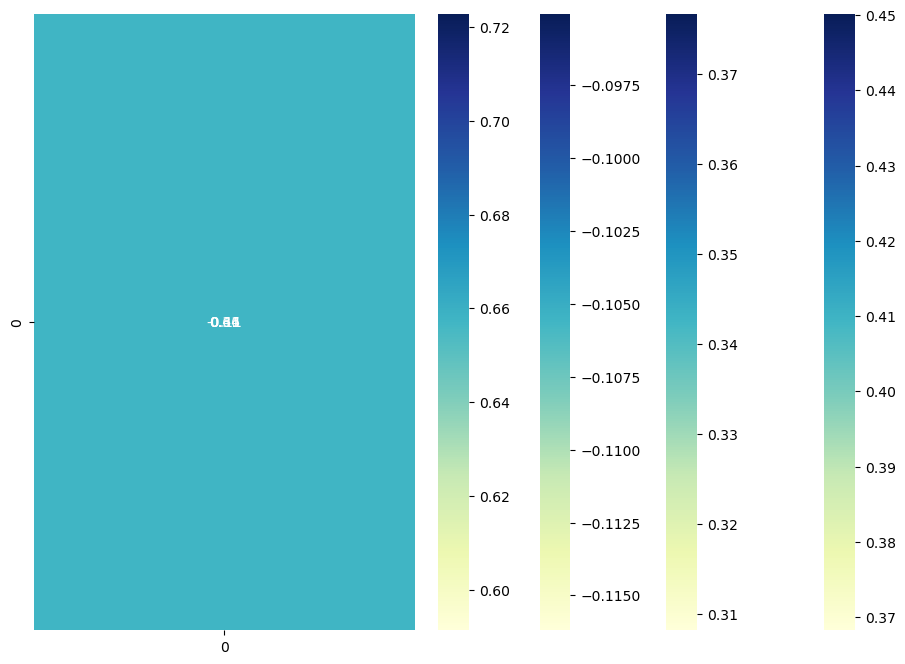

      ID  marr    wage  exper  age  coll  games  minutes  guard  forward  ...  \
0      1     1  1002.5      4   27     4     77     2867      1        0  ...   
1      2     1  2030.0      5   28     4     78     2789      1        0  ...   
2      3     0   650.0      1   25     4     74     1149      0        0  ...   
3      4     0  2030.0      5   28     4     47     1178      0        1  ...   
4      5     0   755.0      3   24     4     82     2096      1        0  ...   
..   ...   ...     ...    ...  ...   ...    ...      ...    ...      ...  ...   
264  265     1  3210.0      7   29     4     79     2638      1        0  ...   
265  266     1   715.0      5   31     4     75     1084      0        1  ...   
266  267     1   600.0     11   33     3     67     1197      1        0  ...   
267  268     0  2500.0      6   28     4     78     2113      0        0  ...   
268  269     0  2000.0     12   33     3     30      282      0        1  ...   

     assists  draft  allsta

PatsyError: Error evaluating factor: NameError: name 'height' is not defined
    height ~ C(wage) + C(exper) +    C(wage):C(exper)
    ^^^^^^

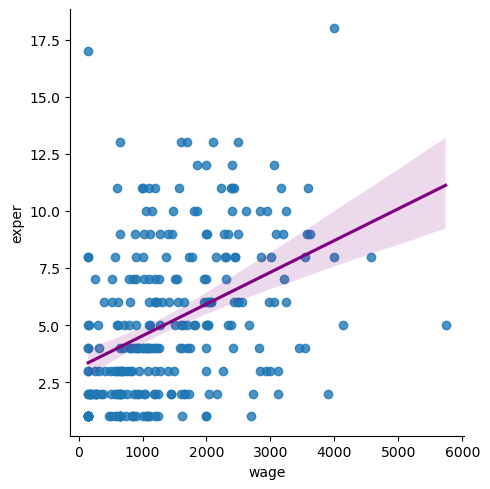

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model._base
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model._base import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import fisher_exact
from statsmodels.formula.api import ols
data=pd.read_excel('NBASAL (3).xls')
corr1 = data['wage'].corr(data['exper'])
corr1 = corr1.reshape(-1,1)
corr2 = data['wage'].corr(data['age'])
corr2 = corr2.reshape(-1,1)
corr3 = data['wage'].corr(data['coll'])
corr3 = corr3.reshape(-1,1)
corr4 = data['wage'].corr(data['points'])
corr4 = corr4.reshape(-1,1)
plt.figure(figsize = (12,8))
df_plot = sns.heatmap(corr1,cmap="YlGnBu", annot=True),sns.heatmap(corr2,cmap='YlGnBu', annot=True),sns.heatmap(corr3, cmap='YlGnBu', annot=True),sns.heatmap(corr4,cmap='YlGnBu', annot=True)
plt.show()
print(data)
print('Интеркорреляция 1:',corr1)
print('Интеркорреляция 2:',corr2)
print('Интеркорреляция 3:',corr3)
print('Интеркорреляция 4:',corr4)
model1=LinearRegression()
x1=data['wage']
y1=data['exper']
X_train, X_test, y_train, y_test = train_test_split(x1, y1, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train= X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
model1.fit(X_train,y_train)
X_test = X_test.values.reshape(-1,1)
y_pred=model1.predict(X_test)
X = sm.add_constant(x1)
model1 = sm.OLS(y1,X)
fitted_model = model1.fit()
print('Информация о первой модели:',fitted_model.summary())
sns.lmplot(x='wage',y='exper',data=data,line_kws={"color":"purple"})
#df1=pd.DataFrame(columns=['wage','exper'])
model2=LinearRegression()
x2=data['wage']
y2=data['age']
X_train, X_test, y_train, y_test = train_test_split(x2, y2, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train= X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
model2.fit(X_train,y_train)
X_test = X_test.values.reshape(-1,1)
y_pred=model2.predict(X_test)
X = sm.add_constant(x2)
model2 = sm.OLS(y2,X)
fitted_model2 = model2.fit()
print('Информация о второй модели:',fitted_model2.summary())
sns.lmplot(x='wage',y='age',data=data,line_kws={"color":"pink"})
model3 = LinearRegression()
x3=data['wage']
y3=data['coll']
X_train, X_test, y_train, y_test = train_test_split(x3, y3, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train= X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
model3.fit(X_train,y_train)
X_test = X_test.values.reshape(-1,1)
y_pred=model3.predict(X_test)
X = sm.add_constant(x3)
model3 = sm.OLS(y3,X)
fitted_model3 = model3.fit()
print('Информация о третьей модели:',fitted_model3.summary())
sns.lmplot(x='wage',y='coll',data=data,line_kws={"color":"blue"})
model4 = LinearRegression()
x4=data['wage']
y4=data['points']
X_train, X_test, y_train, y_test = train_test_split(x4, y4, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train= X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
model4.fit(X_train,y_train)
X_test = X_test.values.reshape(-1,1)
y_pred=model4.predict(X_test)
X = sm.add_constant(x4)
model4 = sm.OLS(y4,X)
fitted_model4 = model4.fit()
print('Информация о четвертой модели:',fitted_model4.summary())
sns.lmplot(x='wage',y='points',data=data,line_kws={"color":"green"})

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

Коэффициенты первой модели: [[0.00141982]]
r^2 №1: 0.157575741766259
VIF: 1.187050337435247
Информация о первой модели:                             OLS Regression Results                            
Dep. Variable:                  exper   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     53.69
Date:                Thu, 11 May 2023   Prob (F-statistic):           2.79e-12
Time:                        12:27:38   Log-Likelihood:                -685.75
No. Observations:                 269   AIC:                             1375.
Df Residuals:                     267   BIC:                             1383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

          VIF   variable
0  469.606147  Intercept
1    9.547106      exper
2    1.118217     points
3    1.031245       coll
4    9.254332        age


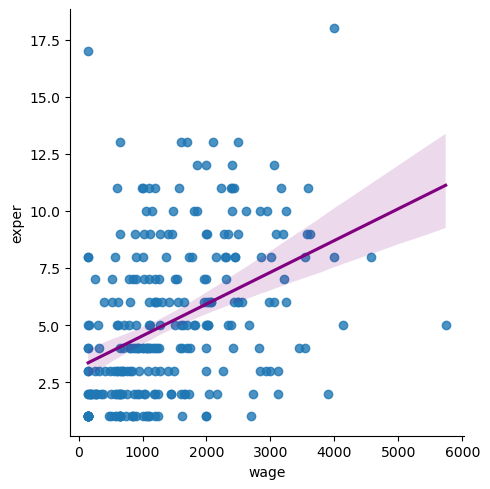

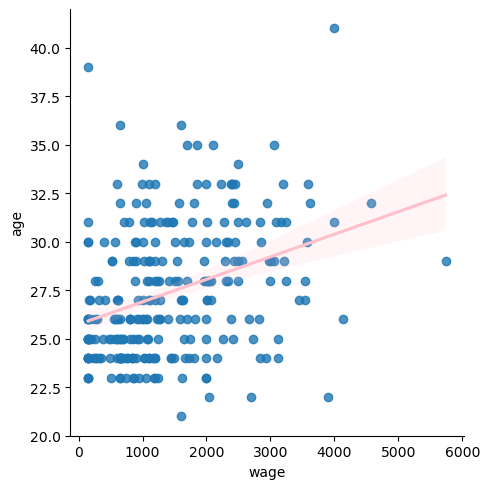

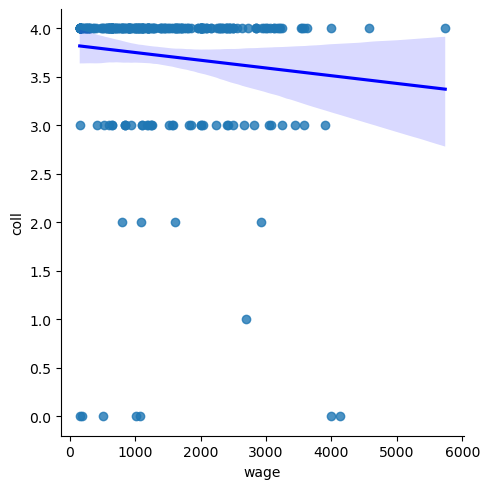

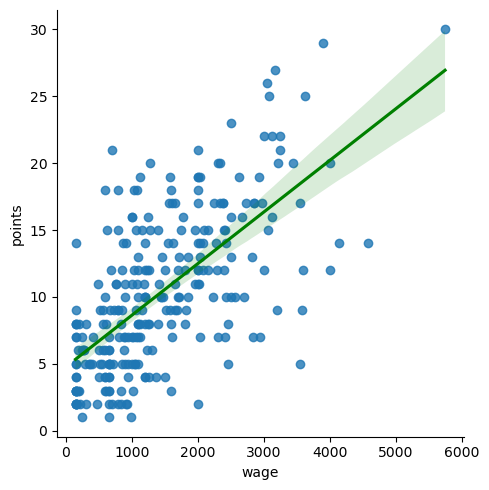

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model._base
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model._base import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from numpy import sqrt
from statistics import mean
df=pd.read_excel('NBASAL (3).xls')
#Первая модель
m1=LinearRegression()
x1=df['wage']
y1=df['exper']
X_train, X_test, y_train, y_test = train_test_split(x1, y1, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train= X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
m1.fit(X_train,y_train)
X_test = X_test.values.reshape(-1,1)
y_pred=m1.predict(X_test)
c1=m1.coef_
print('Коэффициенты первой модели:',c1)
X = sm.add_constant(x1)
m1 = sm.OLS(y1,X)
fit1 = m1.fit()
r2_1=r2_score(y_test,y_pred)
print('r^2 №1:',r2_1)
vif_1 = 1/(1-r2_1)
print('VIF:',vif_1)
print('Информация о первой модели:',fit1.summary())
print('Параметры первой модели:', fit1.params)
sns.lmplot(x='wage',y='exper',data=df,line_kws={"color":"purple"})
#Вторая модель
m2=LinearRegression()
x2=df['wage']
y2=df['age']
X_train, X_test, y_train, y_test = train_test_split(x2, y2, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train= X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
m2.fit(X_train,y_train)
X_test = X_test.values.reshape(-1,1)
y_pred=m2.predict(X_test)
c2 = m2.coef_
print('Коэффициенты второй модели:', c2)
X = sm.add_constant(x2)
m2 = sm.OLS(y2,X)
fit2 = m2.fit()
r2_2=r2_score(y_test,y_pred)
print('r^2:',r2_2)
vif_2 = 1/(1-r2_2)
print('VIF:',vif_2)
print('Информация о второй модели:',fit2.summary())
print('Параметры первой модели:', fit2.params)
sns.lmplot(x='wage',y='age',data=df,line_kws={"color":"pink"})
#Третья модель
m3 = LinearRegression()
x3=df['wage']
y3=df['coll']
X_train, X_test, y_train, y_test = train_test_split(x3, y3, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train= X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
m3.fit(X_train,y_train)
X_test = X_test.values.reshape(-1,1)
y_pred=m3.predict(X_test)
c3=m3.coef_
print('Коэффициенты третьей модели:',c3)
X = sm.add_constant(x3)
m3 = sm.OLS(y3,X)
fit3 = m3.fit()
r2_3=r2_score(y_test,y_pred)
print('r^2:',r2_3)
vif_3 = 1/(1-r2_3)
print('VIF:',vif_3)
print('Информация о третьей модели:',fit3.summary())
print('Параметры третьей модели:', fit3.params)
sns.lmplot(x='wage',y='coll',data=df,line_kws={"color":"blue"})
#Четвертая модель
m4 = LinearRegression()
x4=df['wage']
y4=df['points']
X_train, X_test, y_train, y_test = train_test_split(x4, y4, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train= X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
m4.fit(X_train,y_train)
X_test = X_test.values.reshape(-1,1)
y_pred=m4.predict(X_test)
c4=m4.coef_
print('Коэффициенты четвертой модели:',c4)
X = sm.add_constant(x4)
m4 = sm.OLS(y4,X)
fit4 = m4.fit()
r2_4=r2_score(y_test,y_pred)
print('r^2:',r2_4)
vif_4 = 1/(1-r2_4)
print('VIF:',vif_4)
print('Информация о четвертой модели:',fit4.summary())
print('Параметры четвертой модели:', fit4.params)
sns.lmplot(x='wage',y='points',data=df,line_kws={"color":"green"})
y, X = dmatrices('wage ~ exper+points+coll+age', data=df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
print(vif)
model = LinearRegression()


r^2: 0.5866073328519908
VIF: 2.4190075912545512
beta критерий 1: 0.0599600712655402
t значения для первого фактора: 0     -0.494565
1     -0.052578
2     -1.820525
3     -0.052578
4     -0.936552
         ...   
264    0.831395
265   -0.052578
266    2.599342
267    0.389408
268    3.041328
Name: exper, Length: 269, dtype: float64
beta критерий 2: 0.1387073416523511
t значения для второго фактора: 0     -0.075288
1      0.115773
2     -0.457410
3      0.115773
4     -0.648471
         ...   
264    0.306834
265    0.688956
266    1.071078
267    0.115773
268    1.071078
Name: age, Length: 269, dtype: float64
beta критерий 3: 0.05109697265495841
t значения для третьего фактора: 0      0.146534
1      0.146534
2      0.146534
3      0.146534
4      0.146534
         ...   
264    0.146534
265    0.146534
266   -0.372118
267    0.146534
268   -0.372118
Name: coll, Length: 269, dtype: float64
beta критерий 4: 0.08488866647570997
t значения для четвертого фактора: 0      1.791912
1      0.8

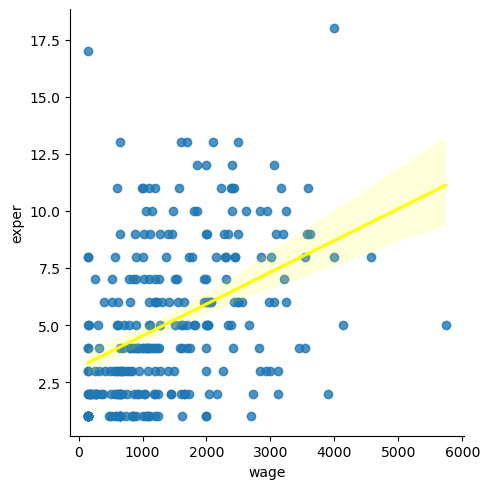

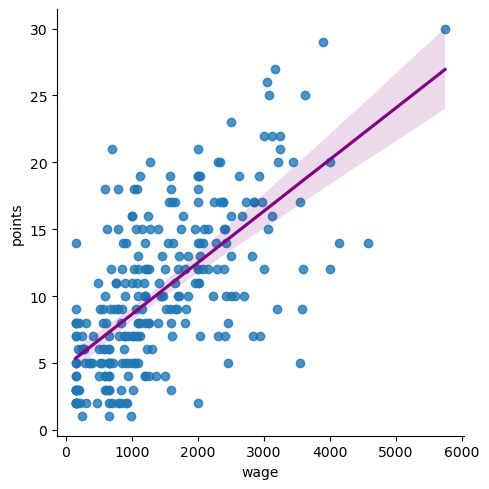

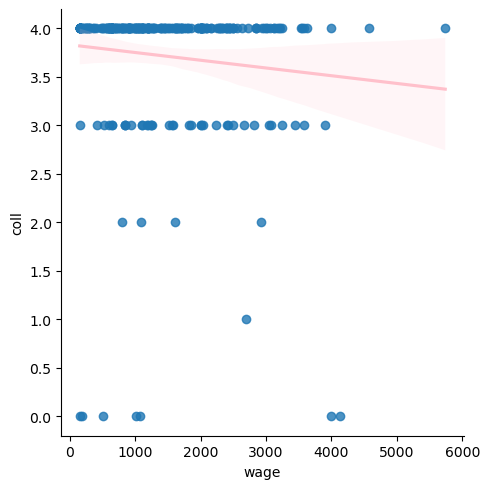

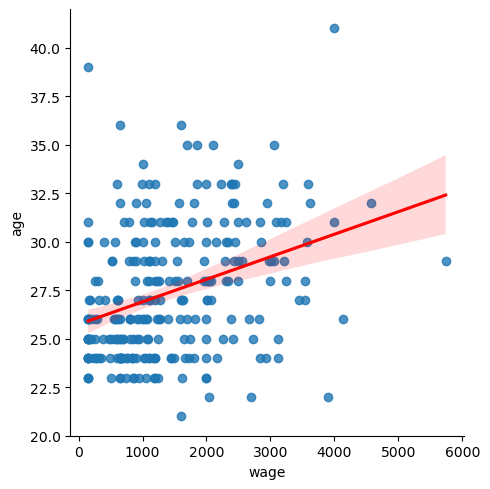

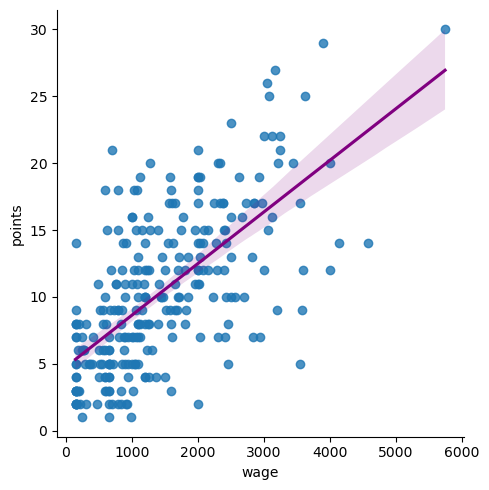

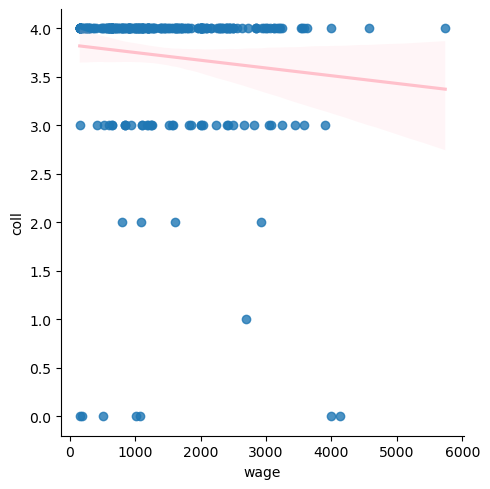

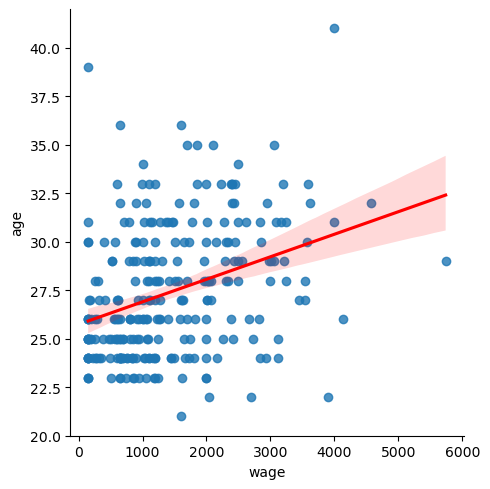

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model._base
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model._base import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from numpy import sqrt
from statistics import mean

nba=pd.read_excel('NBASAL (3).xls')
X=nba[['exper','age','coll','points']]
Y=nba['wage']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression() 
model.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model.predict(X_test)
x = sm.add_constant(X)
fitted_model = sm.OLS(Y,x).fit()

r2=r2_score(y_test,y_pred)
print('r^2:',r2)

t_exper=(df['exper']-df['exper'].mean())/sqrt(mean(nba['exper']))
beta_exper=sqrt(mean(nba['exper']))/sqrt(mean(nba['wage']))
print('beta критерий 1:',beta_exper)
print('t значения для первого фактора:',t_exper)
t_age=(nba['age']-nba['age'].mean())/sqrt(mean(nba['age']))
beta_age=sqrt(mean(nba['age']))/sqrt(mean(nba['wage']))
print('beta критерий 2:',beta_age)
print('t значения для второго фактора:',t_age)
t_coll=(nba['coll']-nba['coll'].mean())/sqrt(mean(nba['coll']))
beta_coll=sqrt(mean(nba['coll']))/sqrt(mean(nba['wage']))
print('beta критерий 3:',beta_coll)
print('t значения для третьего фактора:',t_coll)
t_points=(nba['points']-nba['points'].mean())/sqrt(mean(nba['points']))
beta_points=sqrt(mean(nba['points']))/sqrt(mean(nba['wage']))
print('beta критерий 4:',beta_points)
print('t значения для четвертого фактора:',t_points)

print('Информация о модели:',fitted_model.summary())
print('Параметры модели:', fitted_model.params)

sns.lmplot(x='wage',y='exper',data=df,line_kws={"color":"yellow"})
sns.lmplot(x='wage',y='points',data=df,line_kws={"color":"purple"})
sns.lmplot(x='wage',y='coll',data=df,line_kws={"color":"pink"})
sns.lmplot(x='wage',y='age',data=df,line_kws={"color":"red"})
y, X = dmatrices('wage ~ exper+points+coll+age', data=df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
print(vif)
X2=nba[['points','coll','age']]
Y2=nba['wage']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model2 = LinearRegression() 
model2.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model2.predict(X_test)
x = sm.add_constant(X)
fitted_model2 = sm.OLS(y,x).fit()

y, X2 = dmatrices('wage ~ points+coll+age', data=df, return_type='dataframe')
vif_2 = pd.DataFrame()
vif_2['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif_2['variable'] = X2.columns
print(vif_2)


const     923.183667
exper      38.786356
age        38.285768
coll       57.451811
points      7.672411
dtype: float64
         VIF variable
0   5.831448    exper
1  41.033787      age
2  23.975855     coll
3   4.065139   points
r^2: 0.5866073328519908
VIF: 2.4190075912545512
Информация о модели:                             OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     71.18
Date:                Wed, 03 May 2023   Prob (F-statistic):           7.95e-41
Time:                        21:50:20   Log-Likelihood:                -2140.9
No. Observations:                 269   AIC:                             4292.
Df Residuals:                     264   BIC:                             4310.
Df Model:                           4                                

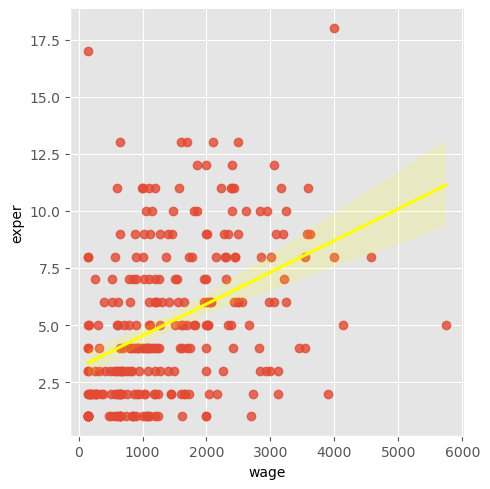

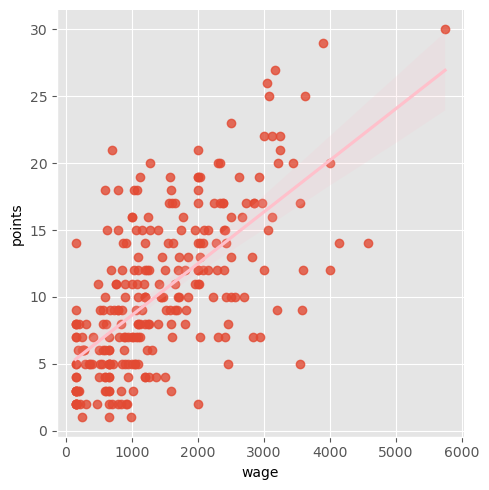

                            OLS Regression Results                            
Dep. Variable:                  exper   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     755.0
Date:                Thu, 11 May 2023   Prob (F-statistic):          1.81e-129
Time:                        15:32:40   Log-Likelihood:                -406.93
No. Observations:                 269   AIC:                             821.9
Df Residuals:                     265   BIC:                             836.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.4678      0.631    -33.999      0.0

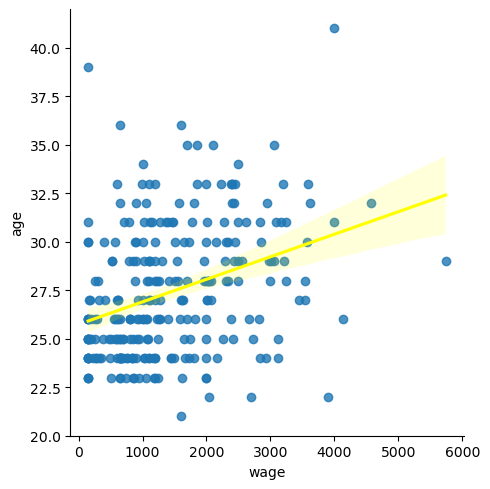

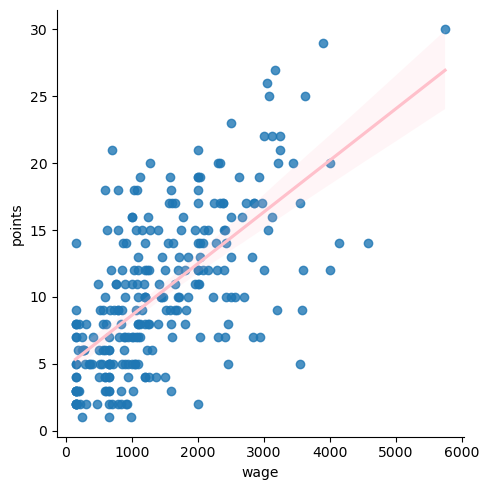

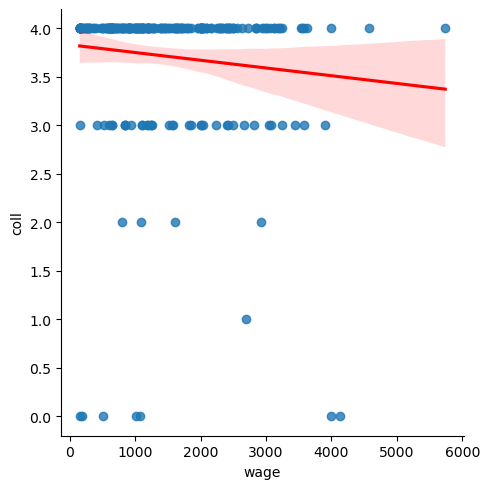

r^2: 0.9509029685474333
VIF № 1: 20.367830201019647
r^2: 0.9421578553870488
VIF № 2: 17.28843227877297
r^2: 0.04149759467393399
VIF № 3: 1.0432941998302208
r^2: 0.7692148750876004
VIF № 4: 4.333034897199617
r^2: 0.015550261874357596
VIF № 1: 1.0157958921335737
r^2: 0.04749473140382365
VIF № 2: 1.049862959260921
r^2: 0.06286853842823514
VIF № 3: 1.0670861464012653
Коэффициенты модели: [-3.35290694e-02  1.41521607e+01  1.14525069e+02]
Информация о модели:                             OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     67.45
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.95e-32
Time:                        12:59:06   Log-Likelihood:                -2163.0
No. Observations:                 269   AIC:                        

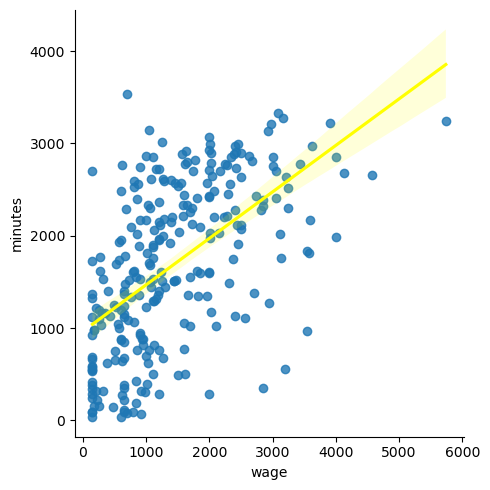

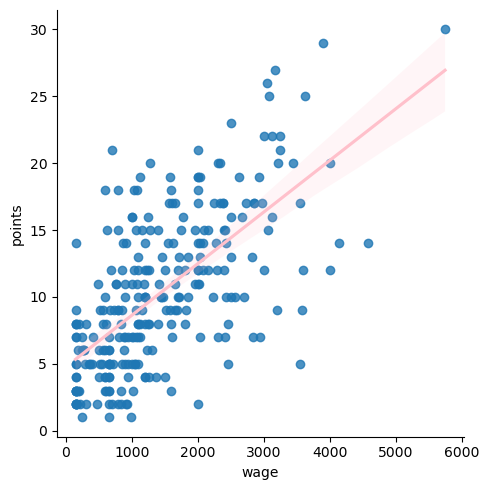

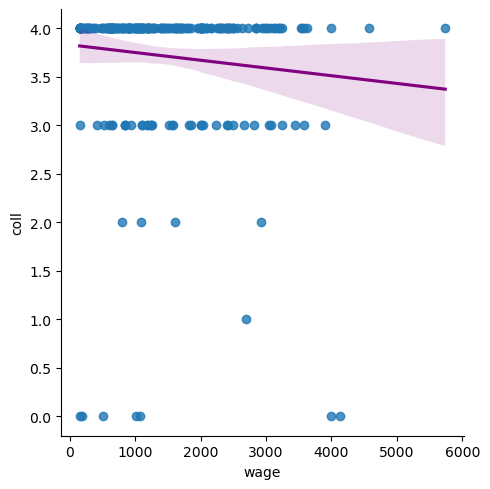

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model._base
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model._base import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from numpy import sqrt
from statistics import mean

df=pd.read_excel('NBASAL (3).xls')
X=df[['minutes','coll','points']]
Y=df['avgmin']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression() 
model.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model.predict(X_test)
x = sm.add_constant(X)
fitted_model = sm.OLS(Y,x).fit()
r2=r2_score(y_test,y_pred)
print('r^2:',r2)
vif_1=1/(1-r2)
print('VIF № 1:', vif_1)

X2=df[['avgmin','coll','points']]
Y2=df['minutes']
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=0)

model2 = LinearRegression() 
model2.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model2.predict(X_test)
x2 = sm.add_constant(X2)
fitted_model_2 = sm.OLS(Y2,x2).fit()

r2_2=r2_score(y_test,y_pred)
print('r^2:',r2_2)
vif_2=1/(1-r2_2)
print('VIF № 2:', vif_2)

X3=df[['avgmin','minutes','points']]
Y3=df['coll']
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=0)

model3 = LinearRegression() 
model3.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model3.predict(X_test)
x3 = sm.add_constant(X3)
fitted_model_3 = sm.OLS(Y3,x3).fit()

r2_3=r2_score(y_test,y_pred)
print('r^2:',r2_3)
vif_3=1/(1-r2_3)
print('VIF № 3:', vif_3)

X4=df[['avgmin','minutes','coll']]
Y4=df['points']
X_train, X_test, y_train, y_test = train_test_split(X4, Y4, test_size=0.2, random_state=0)

model4 = LinearRegression() 
model4.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model4.predict(X_test)
x4 = sm.add_constant(X4)
fitted_model_4 = sm.OLS(Y4,x4).fit()
r2_4=r2_score(y_test,y_pred)
print('r^2:',r2_4)
vif_4=1/(1-r2_4)
print('VIF № 4:', vif_4)

X_n1=df[['coll','points']]
Y_n1=df['age']
X_train, X_test, y_train, y_test = train_test_split(X_n1, Y_n1, test_size=0.2, random_state=0)

model_n1 = LinearRegression() 
model_n1.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model_n1.predict(X_test)
x_n1 = sm.add_constant(X_n1)
fitted_model_n1 = sm.OLS(Y_n1,x_n1).fit()

r2_n1=r2_score(y_test,y_pred)
print('r^2:',r2_n1)
vif_n1=1/(1-r2_n1)
print('VIF № 1:', vif_n1)

X_n2=df[['age','points']]
Y_n2=df['coll']
X_train, X_test, y_train, y_test = train_test_split(X_n2, Y_n2, test_size=0.2, random_state=0)

model_n2 = LinearRegression() 
model_n2.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model_n2.predict(X_test)
x_n2 = sm.add_constant(X_n2)
fitted_model_n2 = sm.OLS(Y_n2,x_n2).fit()

r2_n2=r2_score(y_test,y_pred)
print('r^2:',r2_n2)
vif_n2=1/(1-r2_n2)
print('VIF № 2:', vif_n2)

X_n3=df[['age','coll']]
Y_n3=df['points']
X_train, X_test, y_train, y_test = train_test_split(X_n3, Y_n3, test_size=0.2, random_state=0)

model_n3 = LinearRegression() 
model_n3.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model_n3.predict(X_test)
x_n3 = sm.add_constant(X_n3)
fitted_model_n1 = sm.OLS(Y_n3,x_n3).fit()

r2_n3=r2_score(y_test,y_pred)
print('r^2:',r2_n3)
vif_n3=1/(1-r2_n3)
print('VIF № 3:', vif_n3)

#Итоговая оценка
X_res=df[['minutes','coll','points']]
Y_res=df['wage']
X_train, X_test, y_train, y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=0)

model_res = LinearRegression() 
model_res.fit(X_train, y_train)
y_test=y_test.values.reshape(-1,1)
y_pred=model_res.predict(X_test)
x_res = sm.add_constant(X_res)
fitted_model_res = sm.OLS(Y_res,x_res).fit()

print('Коэффициенты модели:', model_res.coef_)
print('Информация о модели:',fitted_model_res.summary())
print('Параметры модели:', fitted_model_res.params)
sns.lmplot(x='wage',y='minutes',data=df,line_kws={"color":"yellow"})
sns.lmplot(x='wage',y='points',data=df,line_kws={"color":"pink"})
sns.lmplot(x='wage',y='coll',data=df,line_kws={"color":"purple"})